In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vinayakb\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The column or features in the dataset:

Id
ProductId — unique identifier for the product
UserId — unqiue identifier for the user
ProfileName
HelpfulnessNumerator — number of users who found the review helpful
HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not
Score — rating between 1 and 5
Time — timestamp for the review
Summary — brief summary of the review
Text — text of the review

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r'C:\Users\vinayakb\Downloads\Project 3.. Amazon Customers Data Analysis-20240505T123608Z-001\Project 3.. Amazon Customers Data Analysis/database.sqlite')

In [4]:
type(con)

sqlite3.Connection

In [5]:
df = pd.read_sql_query("SELECT * FROM REVIEWS", con)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(568454, 10)

In [8]:
type(df)

pandas.core.frame.DataFrame

# DATA PREPERATION    

Doing basic cleaning/Data wrangling(remove invalid rows , remove duplicate rows ..) & convert "time" feature data-type 
to date-time



In [9]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

'''

HelpfulnessDenominator is : people found useful count + people found not so useful count (ie how many people reviewed )
Helpfulnessnumerator is among those how many found it helpful…..consider it like a percentage….

So, from this we can see that HelfulnessNumerator is always less than or equal to HelpfulnesDenominator..


'''

HelpfulnessNumerator = The number of people who find review helpfull is 124

HelpfulnessDenominator = The number of people who have reviwed or given review which is 134

In [10]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [11]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']] # these two rows are invalid

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [12]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [13]:
df_valid.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
df_valid.shape

(568452, 10)

In [15]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

lets find out whether instances/rows are duplicate or not !

Deduplication means removing duplicate rows, It is necessary to remove duplicates in order to get unbaised results,

Checking duplicates based on UserId, ProfileName, Time, Text as No user can type a review on same exact time for 
different products, so we will remove those records



To identify duplicated reviews based on userid, profile name, time, and text posted at the same time, you can use the `duplicated()` function. This function checks for duplicate rows based on specified columns and returns True for rows that are duplicates. You can then filter your dataset based on these duplicated rows to identify and handle them accordingly.

In [16]:
df_valid.duplicated(['UserId','ProfileName','Time',"Text"])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [17]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time',"Text"])] #these are the duplicate rows find out of all them

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [18]:
data = df_valid.drop_duplicates(subset =['UserId','ProfileName','Time',"Text"] )# dropped all the duplicated rows permanently

In [19]:
data.shape

(393931, 10)

In [20]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Time — timestamp for the review

convert time feature data-type from int64 to date-time !



Now we can see the dtypes, where Time column has int64 data type so we convert it to Date day year format 

In [23]:
data['Time'] = pd.to_datetime(data['Time'], unit = 's')

In [24]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


Analyze the to what amazon can recommend more product?

 Ans :  Conversion rate is when user search a product on amazon and when user also uses youtube platform in the ad the same product is recommend sideways.
 Amazon can enhance product recommendations by correlating user searches on their platform with products advertised on YouTube, thereby increasing conversion rates.

In [26]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [27]:
data['ProfileName'].nunique()# there could be same profilename so we can choose the userid where user id is unique

218418

In [28]:
data['UserId'].nunique()

256059

In [29]:
data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


3.. Analyse to what User Amazon Can recommend more product ?
Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement

In [30]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId',ascending = False)

In [31]:
recommend_df.head()

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211


In [32]:
recommend_df.columns = ['Number_of_summaries','num_text','avg_score','No_of_prods_purchased']

In [33]:
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A2E80MDB9TCNGW,1,1,3.000000,1
A2E80RT3HOR35T,1,1,5.000000,1
A2E816C5N51F6X,1,1,5.000000,1


In [34]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [35]:
recommend_df['Number_of_summaries'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

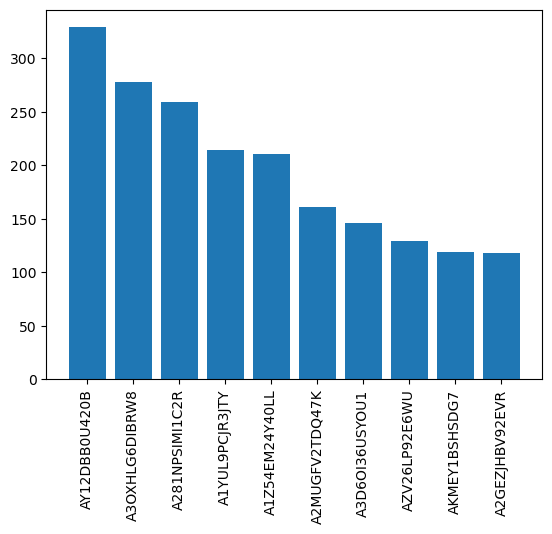

In [36]:
plt.bar(recommend_df.index[0:10],recommend_df['Number_of_summaries'][0:10].values)
plt.xticks(rotation='vertical')

'''
Inference : These are the Top 10 Users so we can recommend more & more Products to these User Id 
            as there will be a high probability that these person are going to be buy more
            
'''

Which product has good reviews?

In [37]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [38]:
data['ProductId'].nunique()

67624

To analyze these many reviews its quiet hectic so, we are choosing only which product has sold frequently and threshold is 600 times purchase

In [49]:
import pandas as pd

# Assuming data is your DataFrame
data['ProductId'] = data['Product']  # Create a new column 'ProductId' with the same values as 'Product'
data.drop(columns=['Product'], inplace=True)  # Drop the 'Product' column


In [50]:
prod_count= data['ProductId'].value_counts().to_frame()

In [51]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B002DNX4GO,1
B000FM2YU2,1
B001M1VA32,1


<Axes: xlabel='count', ylabel='ProductId'>

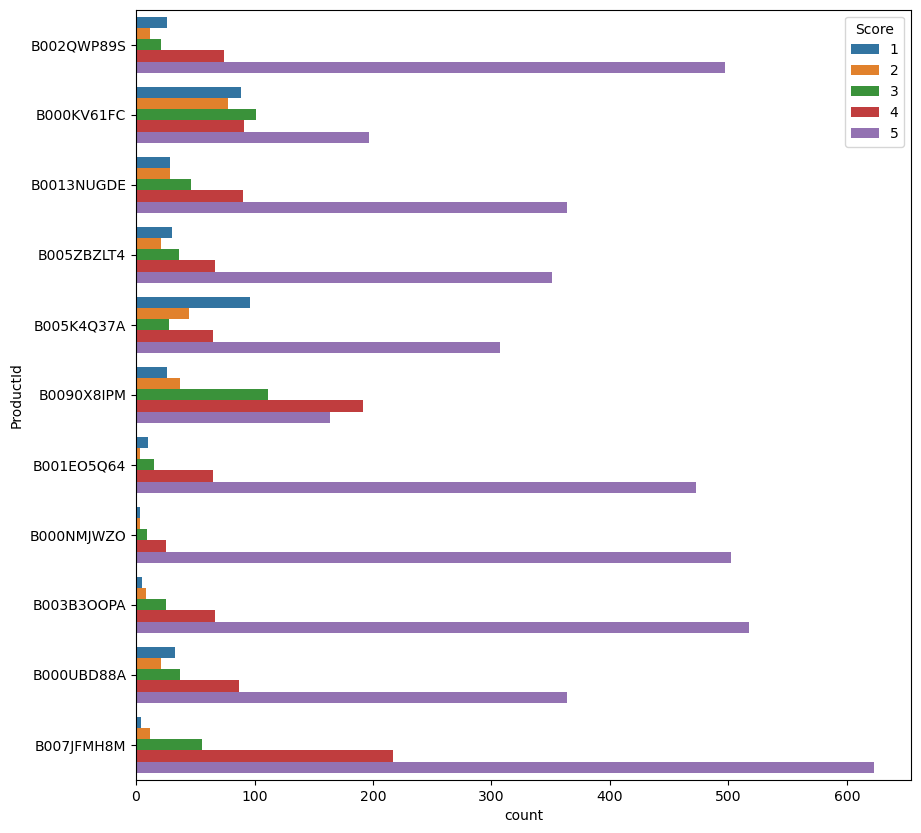

In [61]:
# Filter the DataFrame to include only products sold at least 600 times
freq_prod_df = data[data.groupby('ProductId')['ProductId'].transform('size') > 500]

# Plot the count of each product with 'Score' as hue
plt.figure(figsize=(10, 10))
sns.countplot(y='ProductId', data=freq_prod_df, hue='Score')
#plt.show()


Is there any difference between behaviour of frequent viewer and non frequent viewer?

'''

First lets understand who are frequent viewers & who are not frequent viewers ..

Frequent viewers are those who have bought products atleast 50 times or more ..
Non-Frequent viewers are those who have bought products less than 50 times 


'''

In [62]:
data.columns

Index(['Id', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'ProductId'],
      dtype='object')

In [68]:
x = data['UserId'].value_counts()

In [69]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [71]:
data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

In [74]:
data.drop(columns=['viewer'], inplace=True)

In [75]:
data

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProductId,viewer_type
0,1,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,B001E4KFG0,Not Frequent
1,2,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,B00813GRG4,Not Frequent
2,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,B000LQOCH0,Not Frequent
3,4,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,B000UA0QIQ,Not Frequent
4,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,B006K2ZZ7K,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,B001EO7N10,Not Frequent
568450,568451,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,B003S1WTCU,Not Frequent
568451,568452,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",B004I613EE,Not Frequent
568452,568453,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,B004I613EE,Not Frequent


In [77]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [78]:
data['viewer_type'].nunique()

2

In [79]:
data['viewer_type']=='Not Frequent'

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 393931, dtype: bool

In [81]:
not_freq_df= data[data['viewer_type']=='Not Frequent']
freq_df= data[data['viewer_type']=='Frequent']

In [86]:
freq_df= data[data['viewer_type']=='Frequent']

In [89]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

<Axes: xlabel='Score'>

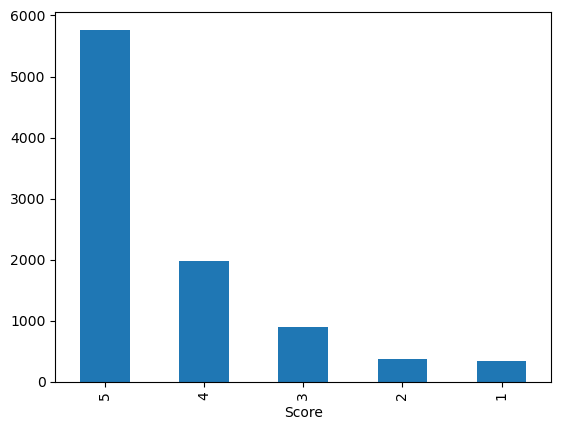

In [90]:
freq_df['Score'].value_counts().plot(kind='bar')

In [91]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

<Axes: xlabel='Score'>

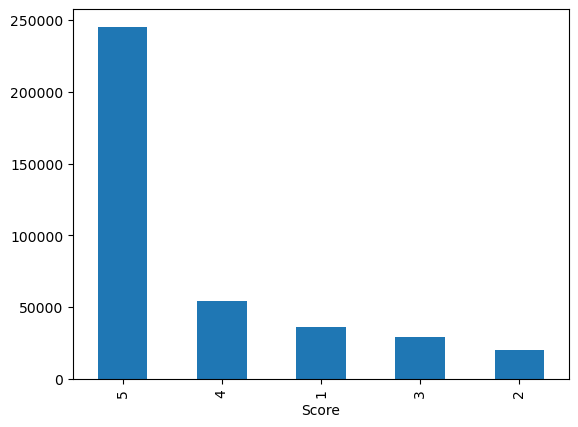

In [92]:
not_freq_df['Score'].value_counts().plot(kind='bar')

'''
The distribution of ratings among frequent reviewers is similar to that of all reviews. 
However, we can see that frequent reviewers give less 5-star reviews and less 1-star review.
Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.

'''

Are frequent viewer verbose?

In [96]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [101]:
len(data['Text'][0].split(' '))

49

In [102]:
def calculate_length(text):
    return len(text.split(' '))

In [105]:
data['text_length'] = data['Text'].apply(calculate_length)

In [106]:
not_freq_data = data[data['viewer_type']=='Not Frequent']
freq_data= data[data['viewer_type']=='Frequent']

'''

 boxplot basically gives us 25th percentile , 50th percentile(median) , 75th percentile & 
 whiskers may be defined in different ways in different tools & packages..

sometimes it shows 99th percentile & 1 percentile value for different package 
sometimes it shows min & max value for different package ..


'''

{'whiskers': [<matplotlib.lines.Line2D at 0x218b653b550>,
 'caps': [<matplotlib.lines.Line2D at 0x218b653d410>,
 'boxes': [<matplotlib.lines.Line2D at 0x218b653a5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x218b653ea90>],
 'fliers': [<matplotlib.lines.Line2D at 0x218b653c410>],
 'means': []}

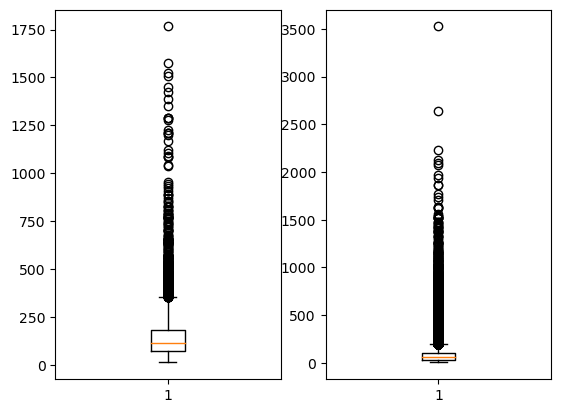

In [110]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['text_length'])
ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['text_length'])

'''
Conclusion : 

The distributions of word counts for frequent and infrequent reviews shows that 
infrequent reviewers have a large amount of reviews of low word count.
On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. 



'''

Sentiment analysis

In [111]:
 from textblob import TextBlob

In [112]:
data['Summary'][0]

'Good Quality Dog Food'

In [113]:
TextBlob('Good Quality Dog Food').sentiment.polarity
sample = data[0:50000]

### if u do not have good specifications , then its good to consider sample of data ..

In [114]:
polarity = []

for text in sample['Summary']: # list which will contain the polarity of the Summaries 
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [115]:
sample['polarity'] = polarity

In [116]:
sample_negative= sample[sample['polarity']<0]

sample_positive= sample[sample['polarity']>0]

In [118]:
from collections import Counter
Counter(sample_negative['Summary']).most_common(10) ## most used negative keywords


[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [119]:
Counter(sample_positive['Summary']).most_common(10) ## most used positive keywords

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]